## 1.1
### 2

O algoritmo que implementa o método de Newton é

In [2]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$. Utilizando o resultado acima, podemos utilizar o método de Newton para aproximar $\ln(3)$. Dessa forma, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Para o chute inicial, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $y=1.1945$. O algoritmo será

In [3]:
# Função f
g(y) = exp(y) - 3

# Derivada da função g
g_linha(y) = exp(y)

# Número de passos
n = 20

# Chute inical
y = 1.1945

# Imprime o resultado
print(newton(y,g,g_linha,n))

1.0986122886681098

## 1.2

In [69]:
using LinearAlgebra

# pontos: São os pontos (x_i,f(x_i)) que serão utilizados na regressão
# grau: Grau do polinômio aproximador
function regressao(pontos, grau)
    # Número de equações geradas, ou linhas na matrix de Vandermonde
    n_eq =  length(pontos)
    # Número de colunas na matrix de Vandermonde
    n_col = grau + 1
    
    # Constroi a matriz de Vandermonde V e a matriz coluna y com os valores f(x_i)
    V = zeros(n_eq, n_col)
    y = zeros(n_eq)
    
    # Constroi a matriz de Vandermonde linha a linha. Assim como a matriz y.
    for i in 1:n_eq
        # Pontos é uma lista de tuplas [(i,f(i)),...,(j,f(j))]
        y[i] = pontos[i][2]
        for j in 1:n_col
            # Construção da matriz V elemento a elemento de uma linha
            V[i,j] = pontos[i][1]^(j-1)
        end
    end
    # Calcula os coeficientes do polinômio aproximador
    return V\y
end

regressao (generic function with 1 method)

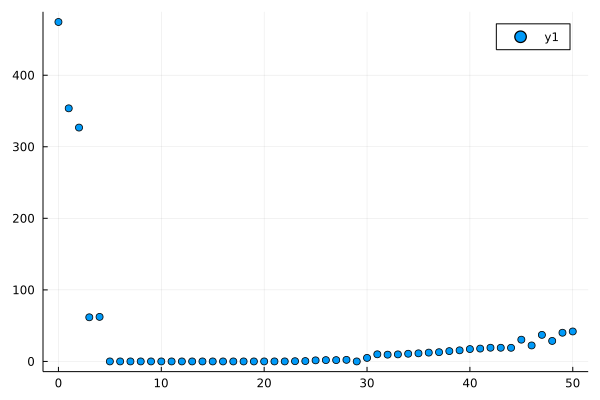

In [5]:
using Plots
using Distributions

# Polinômio de grau 5 
f(x) = x^(5)-x^(4)-x^(3)+x^(2)+x+1

# Pontos sendo gerados aleatoriamente. 
#= Primeiro geramos os valores do domínio i,...,j de forma aleatoria e uniforme, ou seja, evitando repetir valores.
Depois ordenamos estes valores em forma crescente para facilitar no momento do plot. 
A seguir, geramos uma lista com os pontos (i,f(i)),...,(j,f(j)), estes pontos são tuplas.
=#
xs = rand(Uniform(-5, 5), 30)
xs = sort(xs)
pontos = map((x) -> (x, f(x)), xs)

# Função que gera o polinômio aproximador e retorna o valor g(x) para um x dado
# coefs: Lista dos coeficientes computados
# x: Valor do contradomínio
function g(coefs, x)    
    y = 0
    # Computa y = c_0 + c_1x + c_2x^2 + ... + c_(n-1)x^(n-1)
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end

# Erros que serão calculados.
Y = []
# Número de pontos
n_pontos = length(pontos)
# Grau limite que será computado
grau_lim = 50

# Computa o erro para cada polinômio de grau i.
for i in 0:grau_lim
    # Supomos que o erro é 0 no início
    erro = 0
    # Computa os coeficientes do polinîmio aproximador
    coefs = regressao(pontos,i)
    # Soma todos os erros, para cada ponto dado. Assim temos uma "visão" de todos os erros.
    for j in 1:n_pontos
        # Para cada x_j na lista de pontos...
        x = pontos[j][1]
        # ... Somamos f(x_j) a soma dos demais erros calculados nos outros valores do domínio.
        erro = erro + abs(g(coefs,x) - f(x))
    end
    # Computamos a média desses erros, para evitar que o conjunto da imagem seja muito grande devido as somas.
    erro = erro / n_pontos
    
    # Colocamos o erro na lista dos erros calculados
    push!(Y,erro)
end

# Graus que serão calculados
X = 0:grau_lim
scatter(X,Y)

Podemos notar que quando o grau é menor que 5, o erro é grande, como é de se esperar, porque utlizamos um polinômio de grau 5 para gerar os pontos. Dessa forma, a partir do grau 5, a regressão acerta bem até certo ponto, visto que queremos acertar pontos gerados por um polinômio de grau 5 através de um polinômio com grau maior que 5.

Quando o polinômio tem um grau bem maior que 29, ou seja, um grau maior que polinômio interpolador para estes 30 pontos, o erro começa a aumentar novamente. Isso ocorre pois o sistema começa a ter bastante liberdade, já que há mais variáveis para serem determinadas do que equações para restringir do sistema. Sendo assim, um pensamento trivial seria "chutar" valores para essas novas variáveis a serem determinadas, pois teríamos infinitas soluções para o sistema. Como em muitas vezes um chute pode ser errado, o polinômio aproximador também pode errar quando há liberdade demais, ou em outras palavras, quando as variáveis a serem determinadas precisam seguir pouquíssimas equações para serem determinadas.

## 1.3
A matriz $V$ e $y$ abaixo foram construídas através das esquações
$$
F_i - F_j = k_{ij}
$$
onde $F_i$ representa o número de alunos que preferem o filme $f_i$ ao invés do filme $f_j$. $F_j$ representa o número de alunos que preferem o filme $f_j$ ao invés do filme $f_i$. A parte esquerda dessas equações são representas pela matriz $V$, enquanto a parte direita pela matriz $y$. A matriz $p$ que queremos definir que representa a preferência dos alunos em relação a todos os filme é a matriz coluna
$$
\begin{bmatrix}
\text{TS}\\
\text{R}\\
\text{DVPF}\\
\text{CVA}\\
\text{OI}\\
\text{D}\\
\text{BB}\\
\text{HP}\\
\text{S}\\   
\end{bmatrix}
$$
onde cada sigla representa as inicias de cada nome de filme. O resultado você pode ver abaixo

In [6]:
V = [
    1 -1 0 0 0 0 0 0 0; 
    0 0 1 -1 0 0 0 0 0;
    0 0 0 0 1 -1 0 0 0;
    0 0 0 0 0 0 1 -1 0;
    0 0 0 0 0 -1 0 0 1;
    0 -1 0 0 0 0 0 1 0;
    1 0 -1 0 0 0 0 0 0;
    0 0 0 0 1 0 0 -1 0;
    0 0 0 1 0 -1 0 0 0;
    0 0 1 0 0 -1 0 0 0;
    0 -1 0 0 0 0 0 0 1;
    0 0 0 0 1 0 -1 0 0;
    1 0 0 0 0 0 -1 0 0;
    0 0 0 -1 1 0 0 0 0;
    ]
y = [11;3;7;2;9;7;5;5;2;2;11;5;3;7]

p = V\y
print(p)

LoadError: invalid redefinition of constant p

O resultado mostra que o melhor filme é Shrek, pois a variável $S$ possui o maior valor.

## 1.4

In [ ]:
# f: Função que queremos descobrir uma raiz
# a: Primeiro ponto no intervalo analisado
# b: Último ponto no intervalo analisado
# tam: Menor tamanho do intervalo do erro analisado
function bissecao(f,a,b,tam) 
    # Testa se f(a) e f(b) possuem sinais trocados
    if(f(a)*f(b) > 0)
        throw(error("A função não possui os sinais trocados nos pontos f(a) e f(b)"))
    end
    
    # Número de interações que serão calculadas
    # Utilizamos a função floor para retornar apenas a parte inteira do número. 
    # Somamos o valor 1 para retornar um teto maior
    k = floor(log2(abs(a-b)/tam)) + 1
    
    # Repete k vezes.
    for i in 0:k
        # Divide o intervalo em duas partes iguais. A variável m é o "ponto" no meio desse intervalo.
        m = (a+b)/2
        # Se f(a)*f(m) < 0, então quer dizer que a raiz está no intervalo [a,m)
        if(f(a)*f(m) < 0)
            # O último ponto do intervalo observado passa a ser m, dessa forma olhamos para o intervalo [a,m)
            b = m
        # Se f(m)*f(b) < 0, então quer dizer que a raiz está no intervalo (m,b]
        elseif(f(m)*f(b) < 0)
             # O primeiro ponto do intervalo observado passa a ser m, dessa forma olhamos para o intervalo (m,b]
            a = m
        # Senão, m é raiz.
        #= OBS.: Esse último caso pode ser difícil ocorrer devido a imprecisão do ponto flutuante e
        a termos a sorte de a raiz estar exatamente no meio do intervalo.
        =#
        else
            # Retorna o resultado, já que encontramos a raiz
            return m
        end
    end

    # Retorna o resultado final. 
    # A média aqui serve apenas para melhorar o resultado, mas poderíamos printar a ou b.
    return (a+b)/2
end

[(0, 120.6), (1, 121.6), (2, 120.8), (3, 121.4), (4, 121.1), (10, 121.1), (11, 120.4), (12, 120.3), (13, 120.8), (14, 120.6), (15, 119.6), (16, 119.8), (17, 118.7), (18, 120.5), (19, 120.1), (20, 120.2), (21, 120.7), (22, 121.7), (23, 120.7), (24, 120.7), (25, 120.3), (26, 119.4), (27, 119.1), (28, 120.2), (29, 120.7), (30, 120.1), (31, 119.7), (32, 119.2), (33, 119.4), (34, 119.5), (35, 119.0), (36, 118.9), (37, 118.7), (38, 118.3), (39, 118.5), (40, 118.6), (41, 118.8), (42, 118.5), (43, 118.3), (44, 117.8), (45, 118.0), (48, 119.0), (50, 118.4), (52, 116.9), (53, 117.5), (54, 117.4), (55, 117.6), (56, 118.1), (57, 117.3), (58, 117.6), (59, 117.7), (60, 117.6), (61, 117.3), (62, 118.0), (63, 117.8), (64, 117.5), (70, 119.0), (71, 117.6), (72, 116.8), (73, 116.6), (74, 116.9), (76, 116.1), (77, 116.1), (78, 115.8), (79, 115.6), (80, 116.0), (81, 115.4), (82, 115.5), (83, 115.3)]


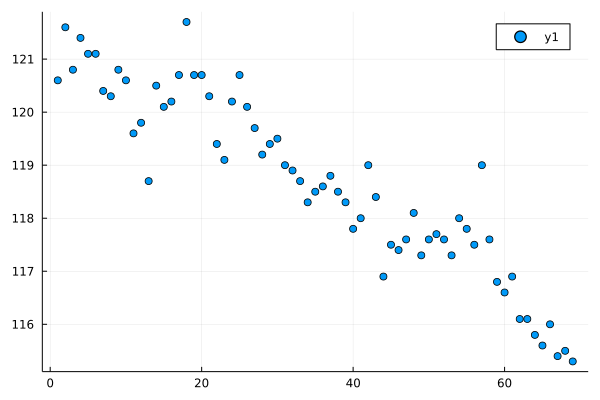

In [101]:
pesos = [
120.6
121.6
120.8
121.4
121.1
121.1
120.4
120.3
120.8
120.6
119.6
119.8
118.7
120.5
120.1
120.2
120.7
121.7
120.7
120.7
120.3
119.4
119.1
120.2
120.7
120.1
119.7
119.2
119.4
119.5
119
118.9
118.7
118.3
118.5
118.6
118.8
118.5
118.3
117.8
118
119
118.4
116.9
117.5
117.4
117.6
118.1
117.3
117.6
117.7
117.6
117.3
118
117.8
117.5
119
117.6
116.8
116.6
116.9
116.1
116.1
115.8
115.6
116
115.4
115.5
115.3
]

dias = [
0
1
2
3
4
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
48
50
52
53
54
55
56
57
58
59
60
61
62
63
64
70
71
72
73
74
76
77
78
79
80
81
82
83
]
function gera_pontos(x,y)
    return (x,y)
end
pontos = map(gera_pontos, dias, pesos)
println(pontos)

coefs = regressao(pontos,1)

# Função que gera o polinômio aproximador e retorna o valor p(x) para um x dado
# coefs: Lista dos coeficientes computados
# x: Valor do contradomínio
function p(x)    
    y = 0
    # Computa y = c_0 + c_1x + c_2x^2 + ... + c_(n-1)x^(n-1)
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end

scatter(pesos)

#=f(x) = p(x) - 100

a = 83
b = 100
tam = 10^-3=#

#x = bissecao(f,a,b,tam)
#p(400)

#plot(p)
#println(x)
#println(p(x))

